In [2]:
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

plt.rcParams['figure.figsize'] = 10, 10

In [11]:
x, y = make_blobs(750, n_features = 2, centers=12)

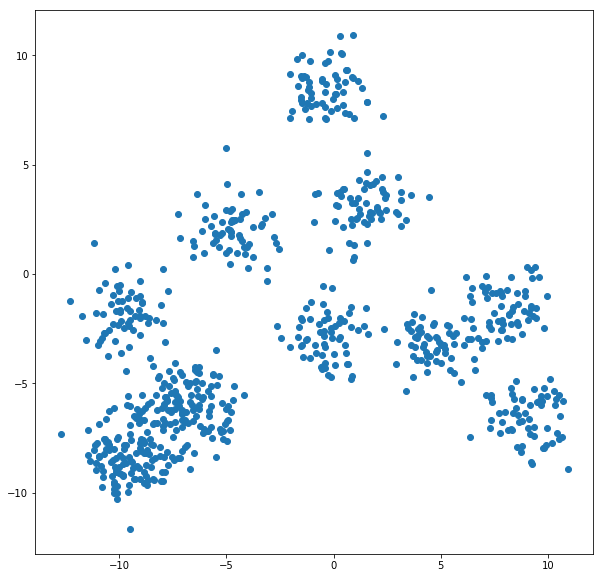

In [12]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [13]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    
    for gap_index, k in enumerate(range(1, maxClusters)):
        
        refDisps = np.zeros(nrefs)
        
        for i in range(nrefs):
            
            randomReference = np.random.random_sample(size=data.shape)
            
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
        
    return (gaps.argmax() + 1, resultsdf)

In [14]:
k, gapdf = optimalK(x, nrefs=5, maxClusters=25)

In [16]:
print('Optimal k is: '+str(k))

Optimal k is: 10


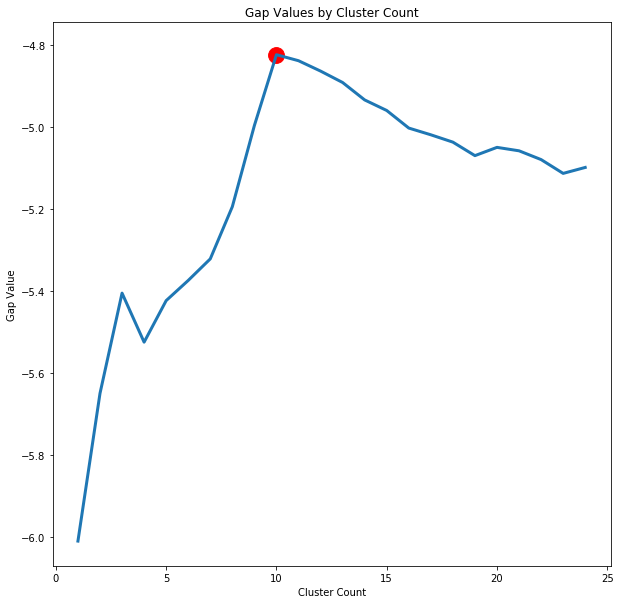

In [17]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid = True
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

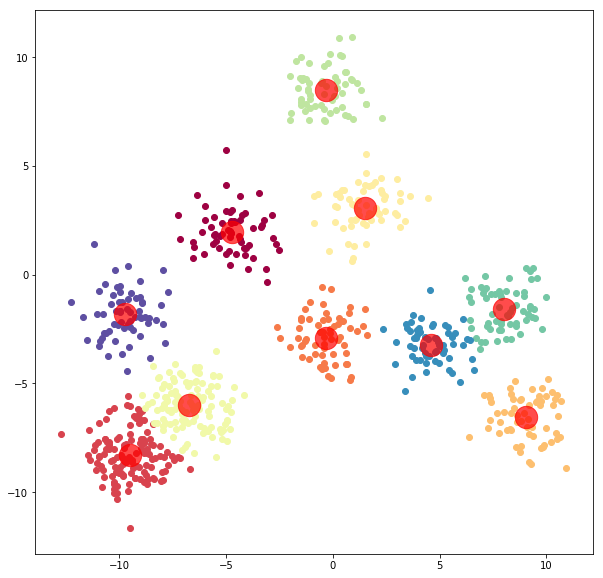

In [25]:
km = KMeans(k)
km.fit(x)

df = pd.DataFrame(x, columns=['x', 'y'])
df['label'] = km.labels_

colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))

for color, label in zip(colors, df.label.unique()):
    
    tempdf = df[df.label == label]
    plt.scatter(tempdf.x, tempdf.y, c=color)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='r', s=500, alpha=0.7)
plt.grid = True
plt.show()

In [30]:
num, gapdf = optimalK(km.cluster_centers_, maxClusters = 5)

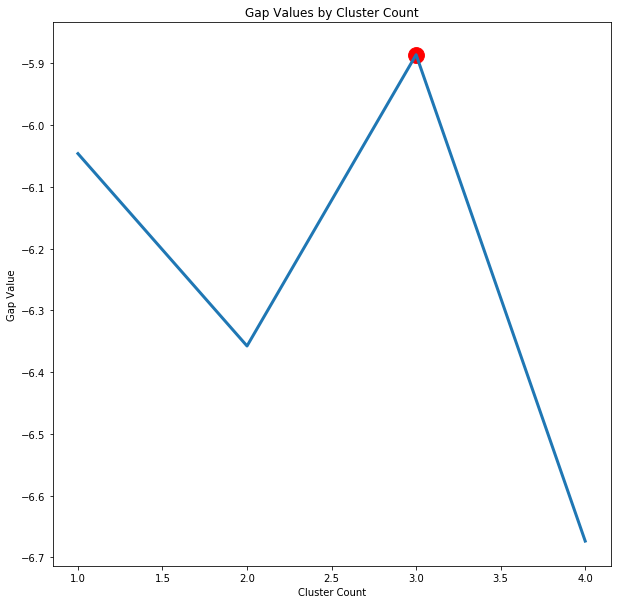

In [31]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == num].clusterCount, gapdf[gapdf.clusterCount == num].gap, s=250, c='r')
plt.grid = True
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


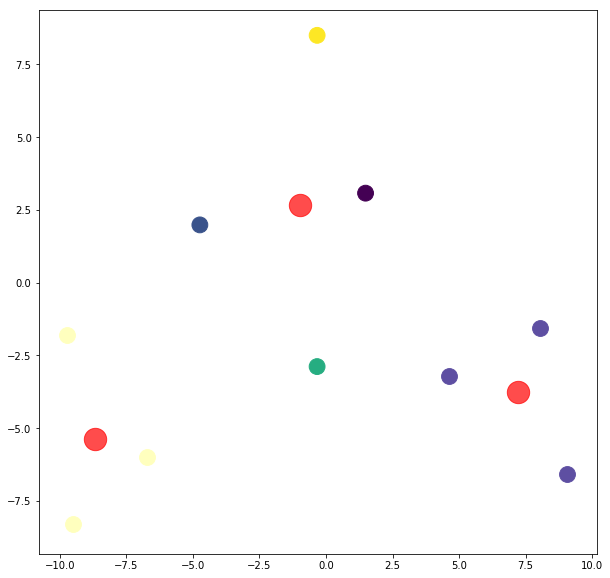

In [32]:
subKm = KMeans(n_clusters=num)
subKm.fit(km.cluster_centers_)

df = pd.DataFrame(km.cluster_centers_, columns=['x','y'])
df['label'] = subKm.labels_

colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))

for color, label in zip(colors, df.label.unique()):
    
    tempdf = df[df.label == label]
    plt.scatter(tempdf.x, tempdf.y, c=color, s=250)
    
plt.scatter(subKm.cluster_centers_[:,0], subKm.cluster_centers_[:, 1], c='r', s=500, alpha=0.7, )
plt.grid = True
plt.show()